In [1]:
## metrices - to check our regrassion algorithm is benificial for 
##----- this type of dataset we use regression algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv("placement.csv")

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in lpa)')

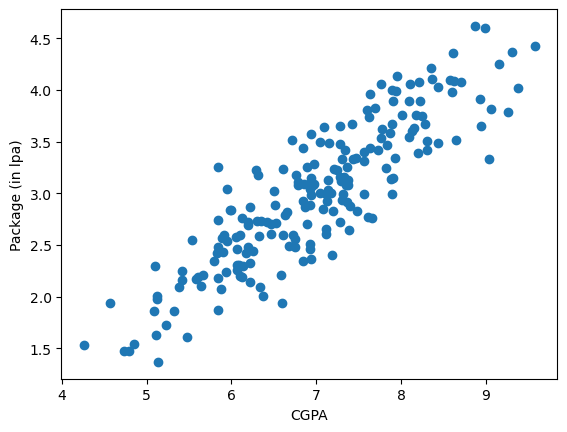

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")

In [7]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package (in lpa)')

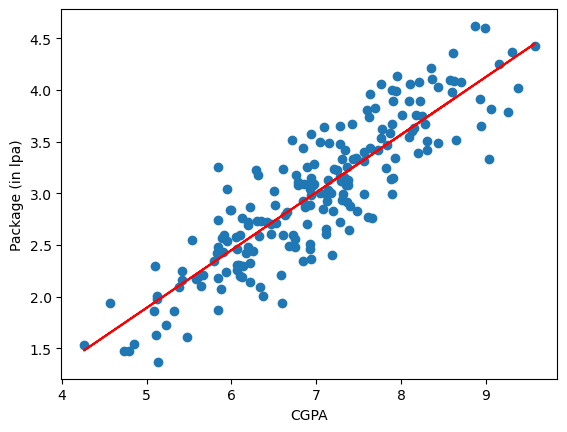

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
y_pred = lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [26]:
print("MEAN_ABSOLUTE_ERROR",mean_absolute_error(y_test,y_pred))

MEAN_ABSOLUTE_ERROR 0.2884710931878175


In [27]:
print("MEAN_SQUARED_ERROR",mean_squared_error(y_test,y_pred))

MEAN_SQUARED_ERROR 0.12129235313495527


In [31]:
print("ROOT_MEAN_SQUARED_ERROR",np.sqrt(mean_squared_error(y_test,y_pred)))

ROOT_MEAN_SQUARED_ERROR 0.34827051717731616


In [35]:
print("R2_SCORE_ERROR",r2_score(y_test,y_pred))
r2 =r2_score(y_test,y_pred)

R2_SCORE_ERROR 0.780730147510384


In [33]:
## adjusted r2 score
x_test.shape

(40, 1)

In [51]:
adjust_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))
adjust_r2

0.7749598882343415

In [40]:
## we are ADDING  RANDOM COLUMN
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.770431,3.26
1,5.12,0.536279,1.98
2,7.82,0.782680,3.25
3,7.42,0.756669,3.67
4,6.94,0.284217,3.57


Text(0, 0.5, 'Package in lpa')

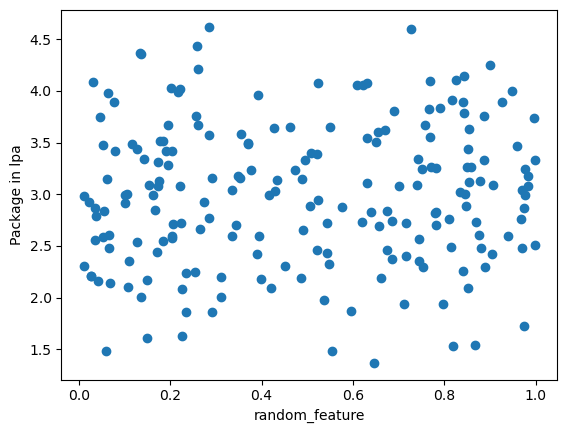

In [41]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package in lpa')

In [44]:
x= new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [46]:
lr =LinearRegression()

In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(x_test)

In [49]:
print("R2 score is",r2_score(y_test,y_pred))

R2 score is 0.7806603736234422


In [53]:
 1 - ((1-r2)*(40-1)/(40-1-2))

0.7688777230514858

In [54]:
new_df1.sample(5)

,cgpa,random_feature,package
186,7.84,0.958771,3.47
154,7.08,0.167274,2.85
59,7.56,0.172927,3.31
68,7.56,0.415985,2.99
198,7.63,0.391099,3.96
